In [31]:
%load_ext autoreload
%autoreload 2
import utils
import os
import numpy as np
from models import TestModels
import data
import moveFiles


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare Data
1. Moves video files into train/test folders, randomly taking videos from the UCF dataset and assigning them to random classes. 
2. Extracts videos into frames
3. Applies video manipulations based on the assigned classes
4. Saves data to numpy files for use in Data Generator

In [238]:
file_limit = 25
moveFiles.moveFiles(file_limit)

#extract videos into frames and create CSV file
pp = data.Preprocessing()
pp.extractAllVideos()

dataset = data.DataSet()
#save training data to .npz files -- need for generator
seq_len_limit = 20
dataset.dumpNumpyFiles(seq_len_limit=seq_len_limit)


  0%|          | 0/18 [00:00<?, ?it/s]

Exporting Train Data...



  0%|          | 0/4 [00:00<?, ?it/s]

Exporting Test Data



100%|██████████| 4/4 [00:03<00:00,  1.39it/s]

# Build DataGenerators and Fit Model

In [174]:
tm = TestModels(5, 'lrcn')
gen = data.DataGenerator(batch_size = 1)
val = data.DataGenerator('test', batch_size = 1)
# tm.model.fit(x,y, batch_size=1, epochs=20, shuffle=True)
# results = tm.model.fit_generator(gen, validation_data = val, epochs=5)

In [711]:
n=19
print(tm.model.predict_classes(np.array([x[n]])))
y[n]

[3]


array([0., 0., 0., 1.], dtype=float32)

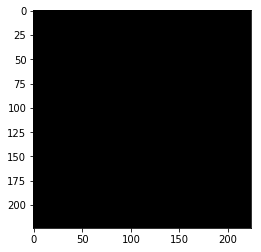

In [694]:
utils.displayImage(x[n][25])

In [180]:

# x1,y1=np.array([x[n]]),np.array([y[n]])
# tm.model.evaluate(x1,y1,batch_size=1)

In [181]:
x[0].shape

(20, 224, 224, 3)

In [274]:
tm = TestModels(5, 'lrcn')
tmtime = TestModels(5, 'lrcn_time')
gen = data.DataGenerator(batch_size = 1)

In [120]:
tmtime.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_25 (TimeDis (None, None, 112, 112, 32 4736      
_________________________________________________________________
time_distributed_26 (TimeDis (None, None, 110, 110, 32 9248      
_________________________________________________________________
time_distributed_27 (TimeDis (None, None, 55, 55, 32)  0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, None, 96800)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 96800)       0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12394624  
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total para

In [275]:
# results = tmtime.model.fit_generator(gen, epochs=5)
results = tm.model.fit_generator(gen, epochs=5)

Epoch 1/5
18/18 [==============================] - 28s 2s/step - loss: 1.7300 - acc: 0.0000e+00
Epoch 2/5
18/18 [==============================] - 24s 1s/step - loss: 1.4809 - acc: 0.4444
Epoch 3/5
18/18 [==============================] - 24s 1s/step - loss: 1.4623 - acc: 0.3889
Epoch 4/5
18/18 [==============================] - 26s 1s/step - loss: 1.4735 - acc: 0.3333
Epoch 5/5
18/18 [==============================] - 25s 1s/step - loss: 1.4024 - acc: 0.5000


# Frame-by-Frame Predictions
- might be incorrect. 

In [276]:
x, y = dataset.all_data_from_npz('train')

In [329]:
n=11
sample = x[n]
label = y[n]
predictions = tm.model.predict(np.expand_dims(sample, axis=1))
print(dataset.reverse_one_hot(label))
for i in range(len(predictions)):
    c = np.argmax(predictions[i])
    print("Frame {0}: ".format(i) + dataset.classes[c] + ", " + str(predictions[i][c]))

black
Frame 0: black, 0.2753028
Frame 1: black, 0.26950064
Frame 2: black, 0.2697326
Frame 3: black, 0.26858842
Frame 4: black, 0.20015422
Frame 5: black, 0.20015422
Frame 6: black, 0.20015422
Frame 7: black, 0.20015422
Frame 8: black, 0.20015422
Frame 9: black, 0.20015422
Frame 10: black, 0.20015422
Frame 11: black, 0.20015422
Frame 12: black, 0.20015422
Frame 13: black, 0.20015422
Frame 14: black, 0.27931488
Frame 15: black, 0.28595677
Frame 16: black, 0.28843993
Frame 17: black, 0.2915002
Frame 18: black, 0.2957852
Frame 19: black, 0.29281023


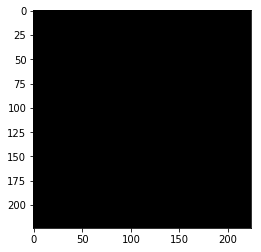

In [328]:
utils.displayImage(sample[4])